##### 新潟大学大学院医歯学総合研究科　顎顔面放射線学分野　学生演習用
Modified by H.Nishiyama<br>
Fork from :https://github.com/oreilly-japan/deep-learning-from-scratch-5<br>
<br>
rosenbrock等高線プロットと上記結果の図示（テキストp.126）追加版

In [1]:
import torch

In [2]:
def rosenbrock(x0, x1):
    y = 100 * (x1 - x0 ** 2) ** 2 + (x0 - 1) ** 2
    return y

In [3]:
x0 = torch.tensor(0.0, requires_grad=True)
x1 = torch.tensor(2.0, requires_grad=True)

In [4]:
y = rosenbrock(x0, x1)
y.backward()
print(x0.grad, x1.grad)

tensor(-2.) tensor(400.)


In [5]:
lr = 0.001  # learning rate
iters = 10000  # iteration count
#>># xp0, xp1: ローゼンブロック関数描画上へのプロット用
xp0=[x0.item()]
xp1=[x1.item()]
#<<#
for i in range(iters):
    if i % 1000 == 0:
        print(x0.item(), x1.item())

    y = rosenbrock(x0, x1)

    y.backward()

    x0.data -= lr * x0.grad.data
    x1.data -= lr * x1.grad.data
    #>>#
    xp0.append(x0.item())
    xp1.append(x1.item())
    #<<#

    x0.grad.zero_()
    x1.grad.zero_()

0.0 2.0
0.6815015077590942 0.46292299032211304
0.8253857493400574 0.6804871559143066
0.8942827582359314 0.7992911338806152
0.9331904053688049 0.8705660700798035
0.9568046927452087 0.9152978658676147
0.9716982245445251 0.9440822601318359
0.9813036918640137 0.9628812670707703
0.98758465051651 0.9752733111381531
0.9917276501655579 0.983490526676178


In [6]:
print(x0.item(), x1.item())

0.9944759607315063 0.9889602065086365


### rosenbrock等高線プロットと上記結果の図示（テキストp.126）
ref: https://www.anarchive-beta.com/entry/2021/06/06/124446#google_vignette<br>
ステップ28：ローゼンブロック関数の可視化【ゼロつく3のノート(メモ)<br>
の改変<br>
ref: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html<br>
matplotlib.pyplot.contour<br>
ref: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html<br>
matplotlib.pyplot.contourf<br>



In [7]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np

In [8]:
# x軸の値を作成
x0_line = np.linspace(-2.0, 2.0, num=500)
print(x0_line[:5])

# y軸の値を作成
x1_line = np.linspace(-1.0, 3.0, num=500)
print(x1_line[:5])



[-2.         -1.99198397 -1.98396794 -1.9759519  -1.96793587]
[-1.         -0.99198397 -0.98396794 -0.9759519  -0.96793587]


In [9]:
# 格子状の点を作成
x0_grid, x1_grid = np.meshgrid(x0_line, x1_line)
print(x0_grid[:5, :5])
print(x1_grid[:5, :5])
print(x0_grid.shape)

[[-2.         -1.99198397 -1.98396794 -1.9759519  -1.96793587]
 [-2.         -1.99198397 -1.98396794 -1.9759519  -1.96793587]
 [-2.         -1.99198397 -1.98396794 -1.9759519  -1.96793587]
 [-2.         -1.99198397 -1.98396794 -1.9759519  -1.96793587]
 [-2.         -1.99198397 -1.98396794 -1.9759519  -1.96793587]]
[[-1.         -1.         -1.         -1.         -1.        ]
 [-0.99198397 -0.99198397 -0.99198397 -0.99198397 -0.99198397]
 [-0.98396794 -0.98396794 -0.98396794 -0.98396794 -0.98396794]
 [-0.9759519  -0.9759519  -0.9759519  -0.9759519  -0.9759519 ]
 [-0.96793587 -0.96793587 -0.96793587 -0.96793587 -0.96793587]]
(500, 500)


In [10]:
# 定数を指定
#a = 1.0
#b = 100.0

# ローゼンブロック関数を計算
#y_grid = b * (x1_grid - x0_grid**2)**2 + (a - x0_grid)**2
y_grid = rosenbrock(x0_grid, x1_grid)

print(y_grid[:5, :5])

[[2509.         2477.05449576 2445.4407886  2414.15642101 2383.19894533]
 [2500.99039361 2469.09619177 2437.53358098 2406.30010372 2375.39331234]
 [2492.99363858 2461.15073913 2429.63922471 2398.45663778 2367.6005307 ]
 [2485.0097349  2453.21813785 2421.7577198  2390.6260232  2359.82060041]
 [2477.03868258 2445.29838793 2413.88906624 2382.80825997 2352.05352148]]


In [11]:
# log10(y)の最小値を取得
y_log10_min = np.floor(np.log10(y_grid.min()) - 1)

# log10(y)の最大値を取得
y_log10_max = np.ceil(np.log10(y_grid.max()) + 1)

# log(y)の最小値から最大値までを等間隔に切り分ける
lev_log10 = np.linspace(y_log10_min, y_log10_max, num=25)

# yに対応した値に戻す
levs = np.power(10, lev_log10)

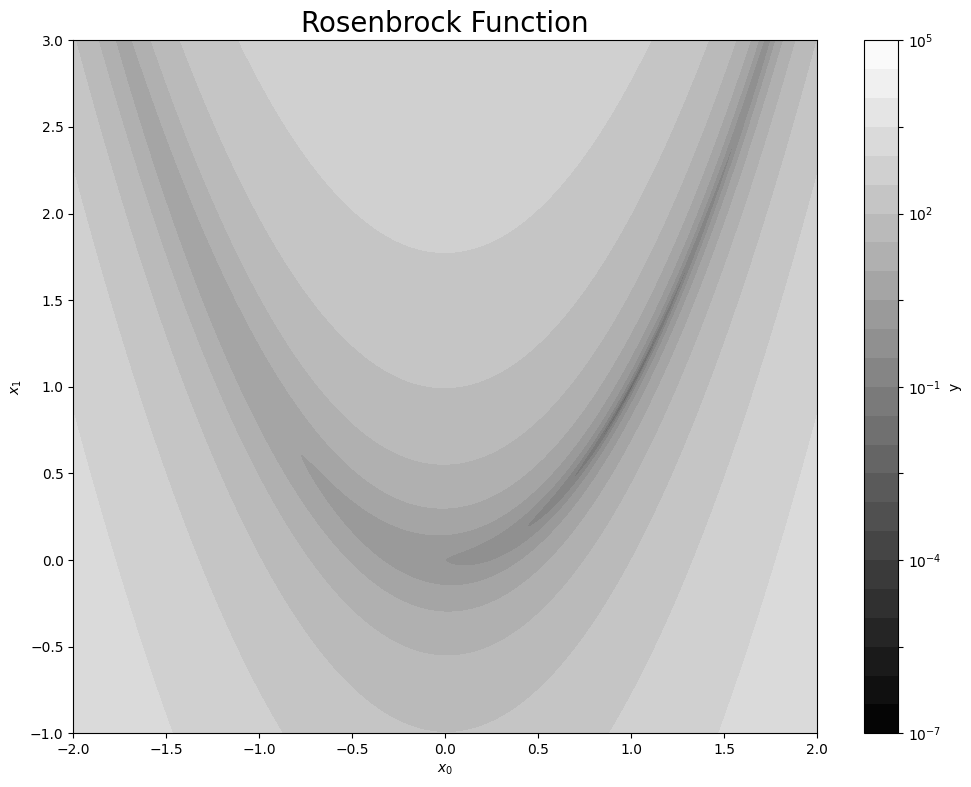

In [14]:
# 等高線図を作成
fig = plt.figure(figsize=(12, 9)) # 図の準備
ax = fig.subplots() # グラフの準備
cs = ax.contourf(x0_grid, x1_grid, y_grid, norm=LogNorm(), levels=levs, zorder=0,cmap='gray') # ローゼンブロック関数
#plt.scatter(1.0, 1.0, marker='*', s=500, c='red') # 最小値
#plt.plot(xp0,xp1,'b--')
ax.set_xlabel('$x_0$') # x軸ラベル
ax.set_ylabel('$x_1$') # y軸ラベル
ax.set_title('Rosenbrock Function', fontsize=20) # タイトル
fig.colorbar(cs, label='y') # 等高線の値
plt.show()

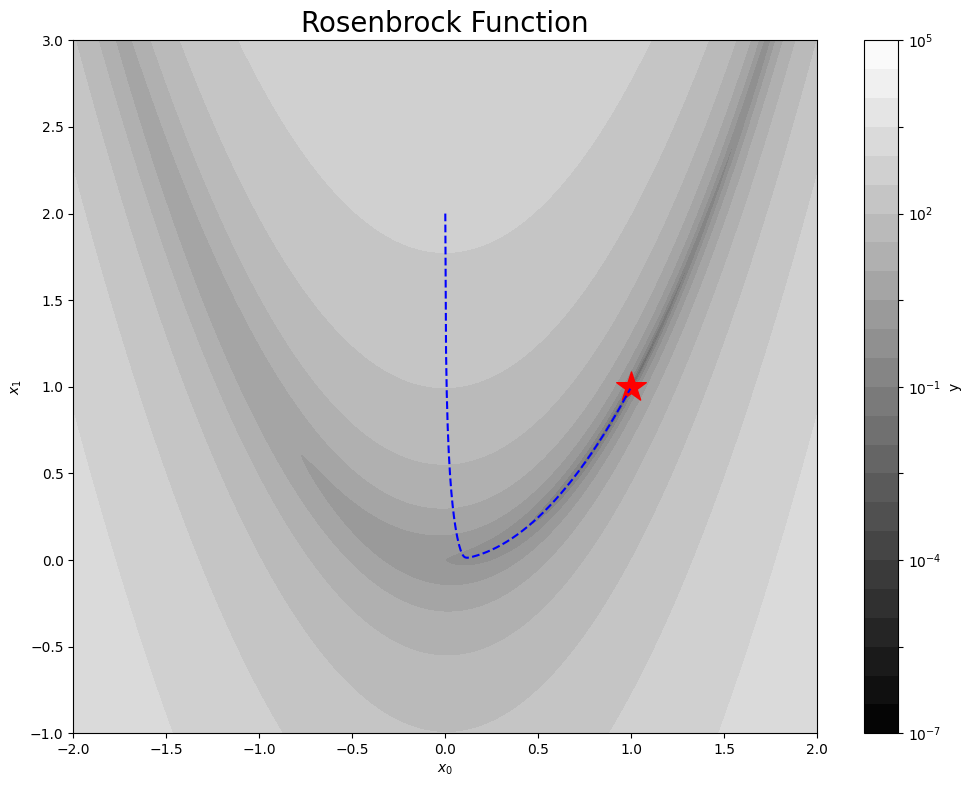

In [16]:
# 等高線図を作成
fig = plt.figure(figsize=(12, 9)) # 図の準備
ax = fig.subplots() # グラフの準備
cs = ax.contourf(x0_grid, x1_grid, y_grid, norm=LogNorm(), levels=levs, zorder=0,cmap='gray') # ローゼンブロック関数
plt.scatter(1.0, 1.0, marker='*', s=500, c='red') # 最小値
plt.plot(xp0,xp1,'b--')
ax.set_xlabel('$x_0$') # x軸ラベル
ax.set_ylabel('$x_1$') # y軸ラベル
ax.set_title('Rosenbrock Function', fontsize=20) # タイトル
fig.colorbar(cs, label='y') # 等高線の値
plt.show()